# Goals

1. Inflation Rate and Interest Rate in the UK, 
2. Compare the US and UK interest rate and inflation filled in line charts
3. Static plot of the 2023 inflation rates worldwide

In [2]:
%matplotlib widget
from matplotlib import pyplot as plt
import matplotlib.animation as animation
import pandas as pd
from IPython.display import display, HTML

In [11]:
# BoE Interest rate history source - https://www.bankofengland.co.uk/boeapps/database/Bank-Rate.asp
# Consumer Price Index History Annual rate source - https://www.ons.gov.uk/economy/inflationandpriceindices/timeseries/l55o/mm23
url = "https://www.bankofengland.co.uk/boeapps/database/Bank-Rate.asp"
tables_cpih = pd.read_html(url, attrs={'id': 'stats-table'})[0]
tables_cpih["Date Changed"] = pd.to_datetime(tables_cpih["Date Changed"], format="%d %b %y")
tables_cpih.head()

,Date Changed,Rate
0,2023-08-03,5.25
1,2023-06-22,5.00
2,2023-05-11,4.50
3,2023-03-23,4.25
4,2023-02-02,4.00


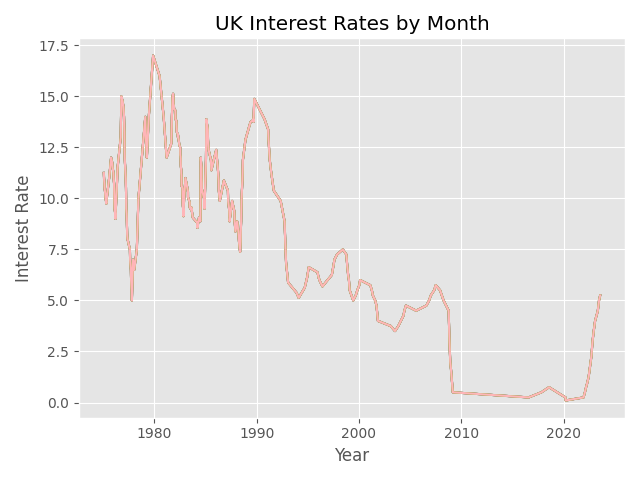

In [18]:
x = tables_cpih["Date Changed"]
y = tables_cpih["Rate"]

plt.clf

plt.style.use('ggplot')
plt.plot(x, y)
plt.xlabel('Year')
plt.ylabel('Interest Rate')
plt.title('UK Interest Rates by Month')
plt.tight_layout()
plt.show()